# Prisoner's Dilemma - Overview and Comparison of Classic and Machine Learning Strategies

	                               Prisoner A
	                         --------------------     
	                         |Cooperate| Defect |    
	               |---------|---------|--------|
	               |Cooperate| (1, 1)  | (0, 3) |
	    Prisoner B |---------|---------|--------|
	               | Defect  | (3, 0)  | (2, 2) |
	               ------------------------------

In [1]:
import axelrod as axl
axl.seed(4)

OUTPUT_DIR = "./output/"
TOURNAMENT_RESULTS_FILE = "tournament_results.png"
TOURNAMENT_PAYOFFS_FILE = "tournament_payoffs.png"
players = []

# Strategies

### Classic

In [2]:
classic = [axl.Cooperator(), # Always cooperates
           axl.Defector(), # Always defects
           axl.Random(), # Random actions
           axl.TitForTat(), # Initially cooperates, then mimimcs opponent moves
           axl.Grumpy(), # Defects after a certain level of grumpiness which increases when the opponent defects and decreases when the opponent co-operates
           axl.Alternator()] # Alternates between cooperating and defecting

### Neural Networks

All Neural Network based strategies have the following features:
* Opponent’s first move is C
* Opponent’s first move is D
* Opponent’s second move is C 
* Opponent’s second move is D
* Player’s previous move is C 
* Player’s previous move is D 
* Player’s second previous move is C 
* Player’s second previous move is D 
* Opponent’s previous move is C 
* Opponent’s previous move is D 
* Opponent’s second previous move is C 
* Opponent’s second previous move is D 
* Total opponent cooperations 
* Total opponent defections 
* Total player cooperations 
* Total player defections 
* Round number

In [3]:
neural_networks = [axl.EvolvedANN(), # ANN with 10 a hidden layer of size 10
                  axl.EvolvedANN5(), # ANN with 10 a hidden layer of size 10
                  axl.EvolvedANNNoise05()] # ANN with a hidden layer of size 5, trained with noise=0.05

# Tournament

In [4]:
players = classic + neural_networks
tournament = axl.Tournament(players=players)
results = tournament.play()
winners = results.ranked_names

Analysing: 100%|██████████| 25/25 [00:00<00:00, 162.61it/s]


# Results

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


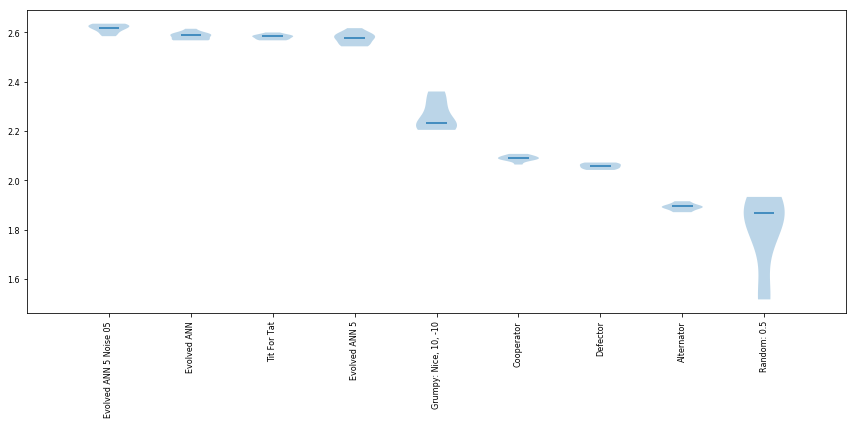

In [5]:
results_plot = axl.Plot(results)
plot = results_plot.boxplot()
plot.show()
plot.savefig(OUTPUT_DIR+TOURNAMENT_RESULTS_FILE)

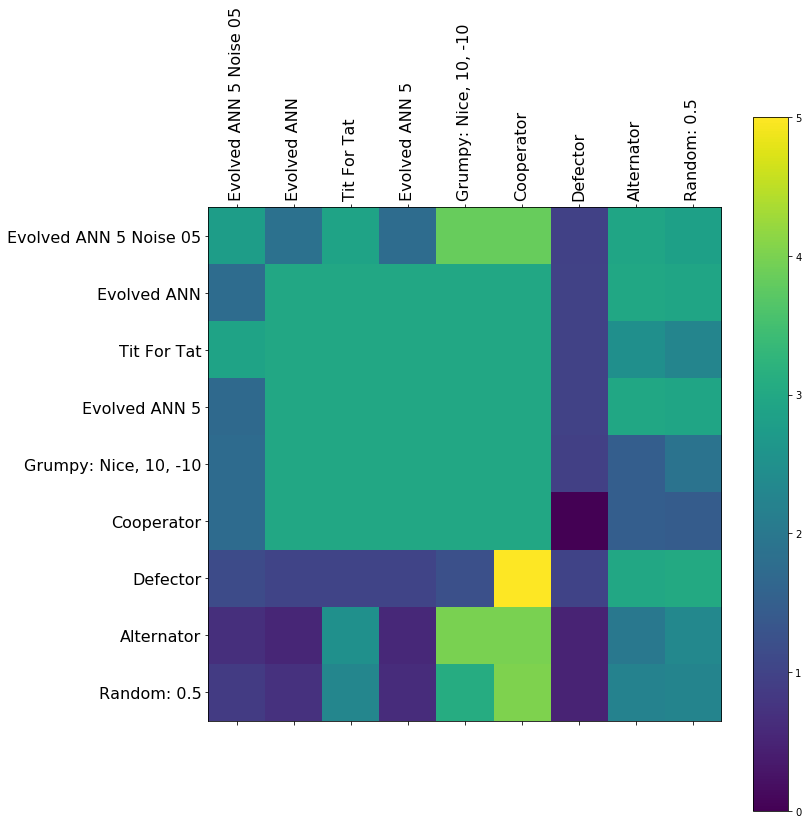

In [6]:
plot = results_plot.payoff()
plot.show()
plot.savefig(OUTPUT_DIR+TOURNAMENT_PAYOFFS_FILE)